In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=10, suppress=True)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# dataset
file = '/Users/hessam_a/new.csv'
dataset = pd.read_csv(file,nrows=60000,low_memory=False)
train_set, test_set = train_test_split(dataset.values, test_size=0.25, random_state=42)

train_X = train_set[:,3:]
test_X = test_set[:,3:]

train_Y = train_set[:,1]/10
test_Y = test_set[:,1]/10

train_X = np.expand_dims(train_X, axis=1)
test_X = np.expand_dims(test_X, axis=1)

In [9]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
#    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 4s 2ms/step - loss: 129702.3203 - mae: 235.3602 - val_loss: 18513.1973 - val_mae: 99.9444
Epoch 2/20
1286/1286 [==============================] - 3s 2ms/step - loss: 16182.1201 - mae: 91.4497 - val_loss: 14663.0879 - val_mae: 87.0491
Epoch 3/20
1286/1286 [==============================] - 3s 2ms/step - loss: 14157.7344 - mae: 84.0394 - val_loss: 13859.7178 - val_mae: 84.9961
Epoch 4/20
1286/1286 [==============================] - 3s 2ms/step - loss: 13219.7393 - mae: 80.1825 - val_loss: 12629.6631 - val_mae: 79.0000
Epoch 5/20
1286/1286 [==============================] - 3s 2ms/step - loss: 12612.7148 - mae: 77.7458 - val_loss: 12879.4785 - val_mae: 80.6189
Epoch 6/20
1286/1286 [==============================] - 3s 2ms/step - loss: 12179.8125 - mae: 76.0487 - val_loss: 12275.0967 - val_mae: 78.1048
Epoch 7/20
1286/1286 [==============================] - 3s 2ms/step - loss: 11797.8975 - mae: 74.6254 - val_loss: 11765.7041 - val_mae

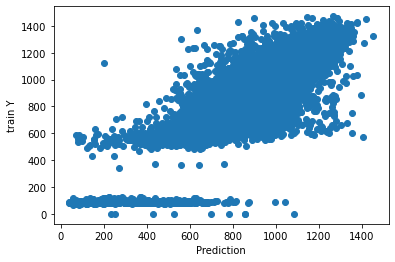

In [11]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

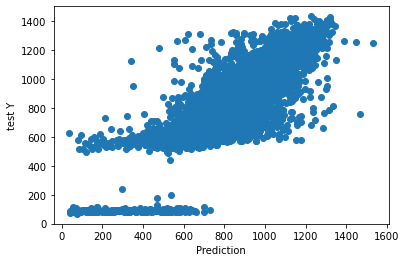

In [12]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [34]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 4s 3ms/step - loss: 150791.2656 - mae: 264.8167 - val_loss: 27631.1309 - val_mae: 125.0368
Epoch 2/20
1286/1286 [==============================] - 4s 3ms/step - loss: 23594.7090 - mae: 112.4503 - val_loss: 19911.3398 - val_mae: 102.7506
Epoch 3/20
1286/1286 [==============================] - 3s 3ms/step - loss: 17310.9297 - mae: 94.6642 - val_loss: 15080.7783 - val_mae: 89.1045
Epoch 4/20
1286/1286 [==============================] - 4s 3ms/step - loss: 14524.8955 - mae: 85.6787 - val_loss: 13670.1992 - val_mae: 83.6540
Epoch 5/20
1286/1286 [==============================] - 4s 3ms/step - loss: 13548.5088 - mae: 81.7166 - val_loss: 12987.4092 - val_mae: 80.8091
Epoch 6/20
1286/1286 [==============================] - 4s 3ms/step - loss: 13034.9385 - mae: 79.8200 - val_loss: 13408.4141 - val_mae: 82.5584
Epoch 7/20
1286/1286 [==============================] - 4s 3ms/step - loss: 12694.2637 - mae: 78.5359 - val_loss: 12391.1279 - val_

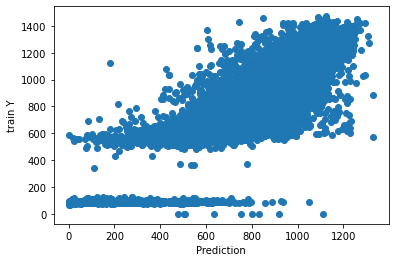

In [36]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

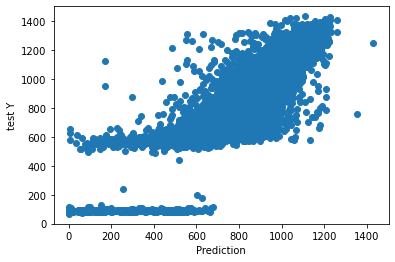

In [37]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [4]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001)),#input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
#    layers.Conv1D(filters=128, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001)),#input_shape=(train_X.shape[1:])),
#    layers.MaxPool1D(pool_size=1),
    layers.Flatten(),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")]

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 5s 4ms/step - loss: 80362.6562 - mae: 176.9288 - val_loss: 16364.6455 - val_mae: 92.8149
Epoch 2/20
1286/1286 [==============================] - 4s 3ms/step - loss: 14705.5029 - mae: 85.7231 - val_loss: 13184.9570 - val_mae: 80.7660
Epoch 3/20
1286/1286 [==============================] - 4s 3ms/step - loss: 12943.2178 - mae: 78.6704 - val_loss: 12667.0479 - val_mae: 79.3702
Epoch 4/20
1286/1286 [==============================] - 5s 4ms/step - loss: 12018.7510 - mae: 75.0678 - val_loss: 11555.7598 - val_mae: 73.6371
Epoch 5/20
1286/1286 [==============================] - 4s 3ms/step - loss: 11288.2002 - mae: 72.1237 - val_loss: 11061.9346 - val_mae: 71.6277
Epoch 6/20
1286/1286 [==============================] - 4s 3ms/step - loss: 10692.1543 - mae: 69.8285 - val_loss: 10801.3320 - val_mae: 70.8127
Epoch 7/20
1286/1286 [==============================] - 4s 3ms/step - loss: 10130.5234 - mae: 67.6371 - val_loss: 10462.6748 - val_mae:

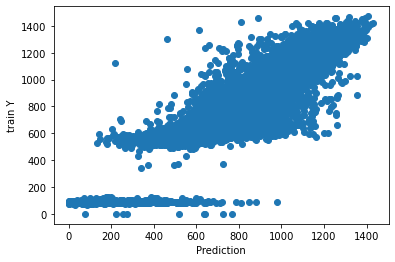

In [6]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

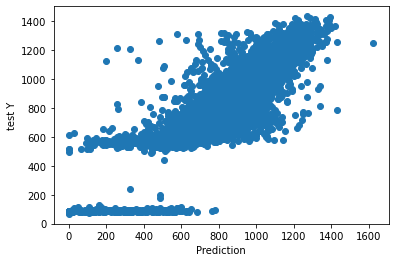

In [7]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [63]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [67]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 6s 4ms/step - loss: 5512.3320 - mae: 49.1264 - val_loss: 8850.8027 - val_mae: 59.7700
Epoch 2/20
1286/1286 [==============================] - 5s 4ms/step - loss: 5323.1147 - mae: 48.5238 - val_loss: 8980.7500 - val_mae: 59.3885
Epoch 3/20
1286/1286 [==============================] - 5s 4ms/step - loss: 5116.3032 - mae: 47.4047 - val_loss: 8778.5068 - val_mae: 58.9272
Epoch 4/20
1286/1286 [==============================] - 5s 4ms/step - loss: 4967.4688 - mae: 46.7763 - val_loss: 8913.1836 - val_mae: 59.4468
Epoch 5/20
1286/1286 [==============================] - 5s 4ms/step - loss: 4815.8452 - mae: 46.2440 - val_loss: 8907.9951 - val_mae: 58.6687
Epoch 6/20
1286/1286 [==============================] - 5s 4ms/step - loss: 4647.9302 - mae: 45.2568 - val_loss: 8966.8672 - val_mae: 59.6071
Epoch 7/20
1286/1286 [==============================] - 5s 4ms/step - loss: 4548.7720 - mae: 44.8884 - val_loss: 8828.2695 - val_mae: 58.6486
Epoch 

In [79]:
(model.predict(train_X)/60).std()

3.132071

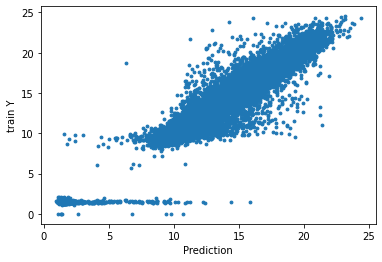

In [68]:
#grayCol = ([0.2, 0.7])#, ,)
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

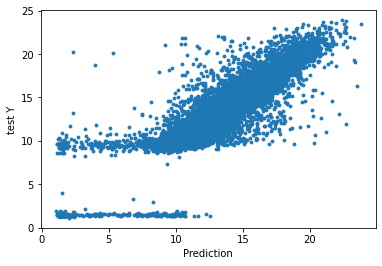

In [69]:
plt.scatter(model.predict(test_X)/60,test_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [91]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [92]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=40,batch_size = 35, shuffle=True)

Epoch 1/40
1286/1286 [==============================] - 6s 4ms/step - loss: 76340.0938 - mae: 172.0551 - val_loss: 15716.0615 - val_mae: 90.7591
Epoch 2/40
1286/1286 [==============================] - 5s 4ms/step - loss: 14433.0010 - mae: 84.7255 - val_loss: 13153.1719 - val_mae: 80.7878
Epoch 3/40
1286/1286 [==============================] - 5s 4ms/step - loss: 12856.1436 - mae: 78.4991 - val_loss: 12157.4443 - val_mae: 76.5169
Epoch 4/40
1286/1286 [==============================] - 5s 4ms/step - loss: 11924.7783 - mae: 74.8354 - val_loss: 11491.6309 - val_mae: 73.6399
Epoch 5/40
1286/1286 [==============================] - 5s 4ms/step - loss: 11082.8838 - mae: 71.6776 - val_loss: 10919.0986 - val_mae: 71.2251
Epoch 6/40
1286/1286 [==============================] - 5s 4ms/step - loss: 10370.5352 - mae: 68.8855 - val_loss: 10509.6543 - val_mae: 69.5661
Epoch 7/40
1286/1286 [==============================] - 5s 4ms/step - loss: 9781.4082 - mae: 66.6561 - val_loss: 10287.9463 - val_mae: 

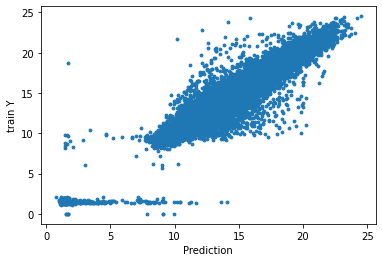

In [93]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

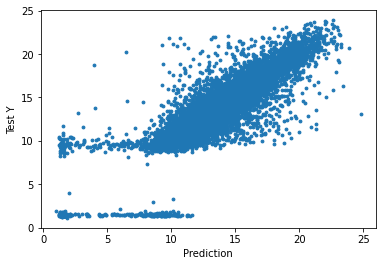

In [94]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("Test Y")
plt.show()

In [101]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [102]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=40,batch_size = 35, shuffle=True)

Epoch 1/40
1286/1286 [==============================] - 10s 7ms/step - loss: 60093.2344 - mae: 148.6939 - val_loss: 13615.2598 - val_mae: 82.5847
Epoch 2/40
1286/1286 [==============================] - 9s 7ms/step - loss: 13033.4219 - mae: 79.3348 - val_loss: 12385.5508 - val_mae: 78.4480
Epoch 3/40
1286/1286 [==============================] - 10s 8ms/step - loss: 11702.4502 - mae: 74.2493 - val_loss: 11190.6064 - val_mae: 72.7046
Epoch 4/40
1286/1286 [==============================] - 11s 9ms/step - loss: 10744.3213 - mae: 70.6322 - val_loss: 10575.9951 - val_mae: 69.7405
Epoch 5/40
1286/1286 [==============================] - 10s 8ms/step - loss: 9898.9854 - mae: 67.2360 - val_loss: 10177.3135 - val_mae: 67.9576
Epoch 6/40
1286/1286 [==============================] - 10s 8ms/step - loss: 9171.4141 - mae: 64.1082 - val_loss: 9845.4551 - val_mae: 65.7434
Epoch 7/40
1286/1286 [==============================] - 12s 9ms/step - loss: 8523.0879 - mae: 61.4005 - val_loss: 9970.9414 - val_mae

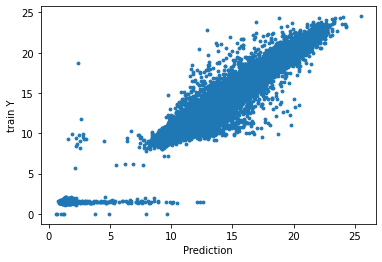

In [103]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

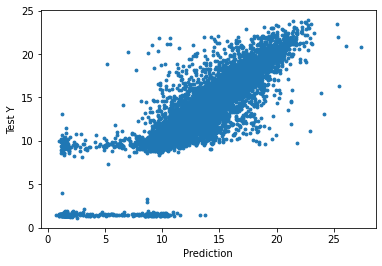

In [105]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlabel("Prediction")
plt.ylabel("Test Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),
    layers.Dense(1)]